# **Assignment Session 2**

In [0]:
# Installing and Importing Keras to the Colab Notebook
# Keras is a high level neural network API which is running on top of Tensorflow
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Here we are importing numpy library so that we can work on large multidimentional arrays
import numpy as np
# Importing required modules from keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
# Importing the MNIST database from datasets in keras 
from keras.datasets import mnist

In [0]:
# The data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


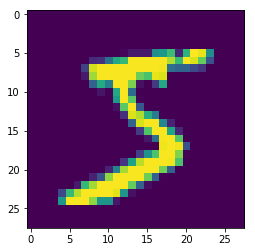

In [0]:
# Printing the shape of the trainig set image (we have 60000 images of size 28x28)
print (X_train.shape)
# Importing pyplot from matplotloib
from matplotlib import pyplot as plt
%matplotlib inline
# showing the 1st training image in the training data set
plt.imshow(X_train[0])

In [0]:
# Reshaping the training and testing images to 28x28 of 1 channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(10000, 28, 28, 1)

In [0]:
# making trining & testing velues be between 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# show first 10 elements
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# show first 10 train elements
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Importing activation and maxpooling modules
from keras.layers import Activation, MaxPooling2D
# Creating a Sequential model by passing default list of layer instances to the constructor:
model = Sequential() 
# 28x28x1 | 3x3x32 > 26x26x32 : Rec. Field 3x3
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# 26x26x32 | 3x3x64 > 24x24x64 : Rec. Field 5x5
model.add(Convolution2D(64, 3, 3, activation='relu'))
# 24x24x64 | 3x3x128 > 22x22x128 : Rec. Field 7x7
model.add(Convolution2D(128, 3, 3, activation='relu'))
# 22x22x128 | MP > 11x11x128 : Rec. Field 14x14
model.add(MaxPooling2D(pool_size=(2, 2)))
# 11x11x128 | 3x3x256 > 9x9x256 : Rec. Field 16x16
model.add(Convolution2D(256, 3, 3, activation='relu'))
# 9x9x256 | 3x3x512 > 7x7x512 : Rec. Field 18x18
model.add(Convolution2D(512, 3, 3, activation='relu'))
# 7x7x512 | 3x3x1024 > 5x5x1024 : Rec. Field 20x20
model.add(Convolution2D(1024, 3, 3, activation='relu'))
# 5x5x1024| 3x3x2048 > 3x3x2048 : Rec. Field 22x22
model.add(Convolution2D(2048, 3, 3, activation='relu'))
# 3x3x2048 | 3x3x10 > 1x1x10 : Rec. Field 24x24
model.add(Convolution2D(10, 3, 3, activation='relu'))
# model.add(Convolution2D(10, 3, 3)

# Flattening and Softmax
model.add(Flatten())
model.add(Activation('softmax'))
# Printing Model Summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykern

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
# model.compile configures the model for training, we are using 'categorical_crossentropy' as the loss function and 'adam' optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model.fit trains the model for 10 epochs using a batch_size of 32
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 120s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - a

In [0]:
# model.evaluate returns the loss value & metrics values for the model in test mode.
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# prints the loss value & metrics values for the model in test mode.
print(score)

[2.3025851249694824, 0.098]


In [0]:
# model.predict generates output predictions for the input sample X_test.
y_pred = model.predict(X_test)

In [0]:
# printing the predictions and the true value of test dataset
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


### Q. What is wrong in the network ?
A. The model is unable to predict the output correctly, the loss term is too much. The model is not able to learn. The reason being we are making many features but we are not mixing the data using 1x1 which helped in reducing the loss. We are incresing the number of parameters too much, which takes too much time and memory.